## Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [3]:
data = pd.read_csv('breaking_bad.csv', encoding='ISO-8859-1')

In [4]:
data

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
0,20-Jan-08,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
1,27-Jan-08,1,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,48,After their first drug deal goes terribly wron...,8.7,1.49
2,10-Feb-08,1,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,48,Walt and Jesse clean up after the bathtub inci...,8.8,1.08
3,17-Feb-08,1,4,Cancer Man,Jim McKay,Vince Gilligan,48,Walt tells the rest of his family about his ca...,8.3,1.09
4,24-Feb-08,1,5,Gray Matter,Tricia Brock,"Vince Gilligan, Patty Lin",48,Walt rejects everyone who tries to help him wi...,8.4,0.97
...,...,...,...,...,...,...,...,...,...,...
57,01-Sep-13,5,12,Rabid Dog,Sam Catlin,"Vince Gilligan, Sam Catlin",48,Walt discovers Jesse broke into his house and ...,9.2,4.41
58,08-Sep-13,5,13,To'hajiilee,Michelle MacLaren,"Vince Gilligan, George Mastras",47,Jesse and Hank come up with an idea to take Wa...,9.8,5.11
59,15-Sep-13,5,14,Ozymandias,Rian Johnson,"Vince Gilligan, Moira Walley-Beckett",48,Walt goes on the run. Jesse is taken hostage. ...,10.0,6.37
60,22-Sep-13,5,15,Granite State,Peter Gould,"Vince Gilligan, Peter Gould",55,Walt struggles as he adapts to aspects of his ...,9.7,6.58


## Aggreagate statistics

In [5]:
data.describe()

,Season,Episode,Duration_mins,Rating_IMDB,U.S. viewers_million
count,62.000000,62.000000,62.000000,62.000000,57.000000
mean,3.290323,7.048387,47.919355,9.022581,2.324386
std,1.359690,4.074822,2.632074,0.511962,1.719224
min,1.000000,1.000000,43.000000,7.800000,0.970000
25%,2.000000,4.000000,47.000000,8.700000,1.460000
50%,3.000000,7.000000,47.000000,8.900000,1.710000
75%,4.750000,10.000000,48.000000,9.450000,2.290000
max,5.000000,16.000000,60.000000,10.000000,10.280000


In [6]:
full_rating = data.agg({
    'Rating_IMDB' : ['mean']
})
full_rating

,Rating_IMDB
mean,9.022581


In [7]:
season_ratings = data.groupby('Season').agg({
    'Rating_IMDB' : ['mean'],
    'U.S. viewers_million' : ['mean']
})
season_ratings

,Rating_IMDB,U.S. viewers_million
,mean,mean
Season,,
1,8.785714,1.230000
2,8.861538,1.355000
3,8.807692,1.516923
4,9.023077,1.866923
5,9.431250,4.315625


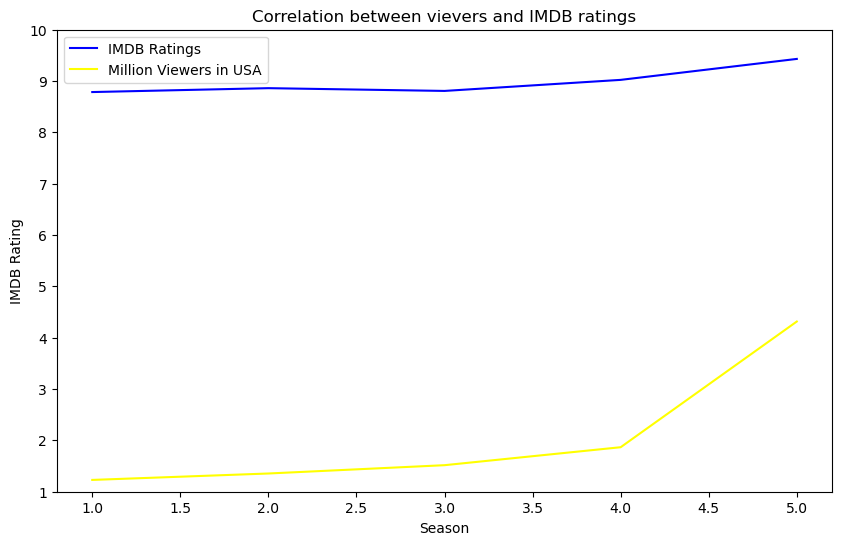

In [8]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plotting mean imdb rating
plt.plot(season_ratings.index, season_ratings[('Rating_IMDB', 'mean')], label='IMDB Ratings', color='blue')

# Plotting mean millin views in US
plt.plot(season_ratings.index, season_ratings[('U.S. viewers_million', 'mean')], label='Million Viewers in USA', color='yellow')

# Labels
plt.xlabel('Season')
plt.ylabel('IMDB Rating')

# Limits
plt.ylim(bottom=1.00)
plt.ylim(top=10.00)
plt.legend()

plt.title('Correlation between vievers and IMDB ratings')
plt.show()

## Tasks

Easy Task
Count the Number of Episodes Each Director Directed

In [21]:
directors = data['Directed by'].unique()
directors

array(['Vince Gilligan', 'Adam Bernstein', 'Jim McKay', 'Tricia Brock',
       'Bronwen Hughes', 'Tim Hunter', 'Bryan Cranston', 'Charles Haid',
       'Terry McDonough', 'John Dahl', 'Johan Renck', 'Peter Medak',
       'Félix Enríquez Alcalá', 'Michelle MacLaren', 'Phil Abraham',
       'Colin Bucksey', 'Scott Winant', 'John Shiban', 'Michael Slovis',
       'Rian Johnson', 'David Slade', 'Peter Gould', 'George Mastras',
       'Thomas Schnauz', 'Sam Catlin'], dtype=object)

In [27]:
dir_counts = data.groupby('Directed by').agg({
    'Directed by' : ['count']
}).reset_index()

dir_counts.columns=['Director', 'Count']
dir_counts
dir_counts.sort_values(by='Count', ascending=False)

,Director,Count
13,Michelle MacLaren,11
0,Adam Bernstein,8
24,Vince Gilligan,5
12,Michael Slovis,4
4,Colin Bucksey,4
2,Bryan Cranston,3
20,Terry McDonough,3
17,Rian Johnson,3
9,Johan Renck,3
19,Scott Winant,2


Medium Task
Find the Highest and Lowest-Rated Episodes Based on IMDb Ratings

In [35]:
highest_rated_score = data['Rating_IMDB'].max()
highest_rated_title = data[data['Rating_IMDB'] == highest_rated_score]
highest_rated_title['Title']

59    Ozymandias
Name: Title, dtype: object

In [33]:
lowest_rated_score = data['Rating_IMDB'].min()
lowest_rated_title = data[data['Rating_IMDB'] == lowest_rated_score]
lowest_rated_title['Title']

29    Fly
Name: Title, dtype: object

Hard Task
Calculate the Average IMDb Rating Per Season

In [37]:
season_ratings['Rating_IMDB']

,mean
Season,
1,8.785714
2,8.861538
3,8.807692
4,9.023077
5,9.431250


Expert Task
List All Episodes Directed by a Specific Director and Calculate Their Average IMDb Rating

In [38]:
specific_director = directors[0]
specific_director

'Vince Gilligan'

In [41]:
made_by_director = data[data['Directed by'] == specific_director]
made_by_director

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
0,20-Jan-08,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
32,13-Jun-10,3,13,Full Measure,Vince Gilligan,Vince Gilligan,47,Jesse has disappeared and Walt is in big troub...,9.7,1.56
44,02-Oct-11,4,12,End Times,Vince Gilligan,"Vince Gilligan, Thomas Schnauz, Moira Walley-B...",47,The DEA is putting Hank and his family in prot...,9.5,1.73
45,09-Oct-11,4,13,Face Off,Vince Gilligan,Vince Gilligan,51,Jesse is brought to the FBI for questioning on...,9.9,1.90
61,29-Sep-13,5,16,Felina,Vince Gilligan,Vince Gilligan,55,Walter White makes one last attempt to secure ...,9.9,10.28


In [43]:
made_by_director_rating = made_by_director['Rating_IMDB'].mean()
made_by_director_rating

9.62

God-Level Task
Analyze the Most Frequent Collaborations Between Directors and Writers

In [61]:
collaborations = data.groupby(['Directed by', 'Written by']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).reset_index(drop=True)
collaborations.head()

,Directed by,Written by,Count
0,Adam Bernstein,Vince Gilligan,4
1,Vince Gilligan,Vince Gilligan,4
2,Michelle MacLaren,"Vince Gilligan, George Mastras",3
3,Michelle MacLaren,"Vince Gilligan, Thomas Schnauz",3
4,Adam Bernstein,"Vince Gilligan, Peter Gould",2


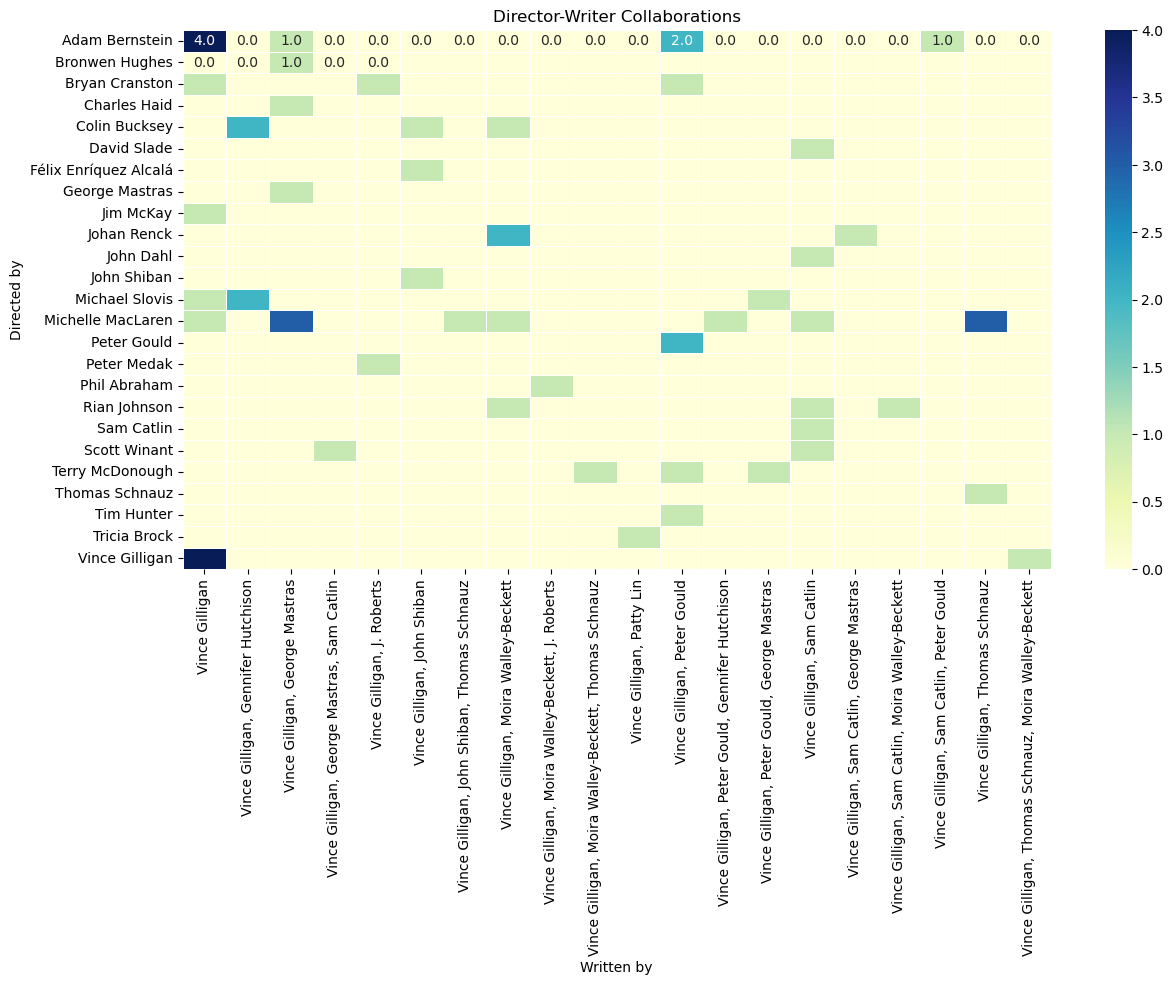

In [65]:
# Visualize the collaborations
plt.figure(figsize=(14, 7))
collaboration_pivot = collaborations.pivot(index='Directed by', columns='Written by', values='Count').fillna(0)
sns.heatmap(collaboration_pivot, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5)
plt.title('Director-Writer Collaborations')
plt.show()